<hr>
<h1><center>Data Modeling</center></h1>
<hr>

### Data Description

Data from September 2020 to April 2022

1. Date
2. Time 
3. Water Content (m3/m3)
4. Solar Radiation (W/m2)
5. Rain (mm)
6. Temperature (Celcuis)
7. RH (%)
8. Wind Speed (m/s)
9. Gust Speed (m/s)
10. Wind Direction (Degree)
11. Dew Point (Celcuis)

# Import Packages

In [21]:
# importing the required modules
import os
import glob

# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#important libraries for statistical 

from datetime import datetime, date 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


# Read Data

In [81]:
# specifying the path to csv files
# change ur directory here based on pwd
path = "C:/Users/osssa/Desktop/Projects II/Cambodia_Weather_Forcasting_Prediction_With_Time_Series/datasets"

# csv files in the path
data = pd.read_csv(path + "/intermediate_layer/kompong_cham/cleaned_dataset_kompong_cham.csv")
data.drop(["Unnamed: 0", "Export settings name: KPC Data", "CE SAIN Weather Station KPC"], axis=1, inplace=True)
data.head(100)

,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
0,21/04/01,00:00:00,0.7186,1.0,0.0,78.4,3.0,6.0,201.0,27.70,23.63
1,21/04/01,00:15:00,0.7186,1.0,0.0,79.5,2.7,4.3,209.0,27.60,23.77
2,21/04/01,00:30:00,0.7186,1.0,0.0,80.4,2.3,4.3,211.0,27.48,23.83
3,21/04/01,00:45:00,0.7186,1.0,0.0,81.2,2.3,4.0,201.0,27.28,23.81
4,21/04/01,01:00:00,0.7186,1.0,0.0,81.9,2.7,4.0,197.0,27.16,23.83
...,...,...,...,...,...,...,...,...,...,...,...
95,21/04/01,23:45:00,0.7186,1.0,0.0,81.3,2.7,5.0,204.0,28.22,24.74
96,21/04/02,00:00:00,0.7186,1.0,0.0,82.2,2.7,4.7,194.0,28.10,24.80
97,21/04/02,00:15:00,0.7186,1.0,0.0,82.9,3.0,5.0,197.0,28.02,24.87
98,21/04/02,00:30:00,0.7186,1.0,0.0,83.8,3.0,4.7,197.0,27.85,24.89


# Data Quality Checking
***

In [82]:
#check the data missing 
data.isnull().any()

date               False
time               False
water_content      False
solar_radiation    False
rain               False
temperature        False
rh                 False
wind_speed         False
gust_speed         False
wind_direction     False
dew_point          False
dtype: bool

In [83]:
#sum it if it has any
data.isnull().sum()

date               0
time               0
water_content      0
solar_radiation    0
rain               0
temperature        0
rh                 0
wind_speed         0
gust_speed         0
wind_direction     0
dew_point          0
dtype: int64

In [84]:
#list all the columns which has in dataset 
for i,j in enumerate(data.columns):
    print(i, " ", j)

0   date
1   time
2   water_content
3   solar_radiation
4   rain
5   temperature
6   rh
7   wind_speed
8   gust_speed
9   wind_direction
10   dew_point


In [85]:
#check the number of columns and rows in dataframe
print("Number of rows in dataframe: ", data.shape[0])
print("**"*50)
print("Number of columns in dataframe: ", data.shape[1])

Number of rows in dataframe:  56372
****************************************************************************************************
Number of columns in dataframe:  11


In [86]:
#checking all datatype in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56372 entries, 0 to 56371
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             56372 non-null  object 
 1   time             56372 non-null  object 
 2   water_content    56372 non-null  float64
 3   solar_radiation  56372 non-null  float64
 4   rain             56372 non-null  float64
 5   temperature      56372 non-null  float64
 6   rh               56372 non-null  float64
 7   wind_speed       56372 non-null  float64
 8   gust_speed       56372 non-null  float64
 9   wind_direction   56372 non-null  float64
 10  dew_point        56372 non-null  float64
dtypes: float64(9), object(2)
memory usage: 4.7+ MB


# Data Wrangling | Cleansing
***

In [88]:
#select only number features
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
numeric_features

['water_content',
 'solar_radiation',
 'rain',
 'temperature',
 'rh',
 'wind_speed',
 'gust_speed',
 'wind_direction',
 'dew_point']

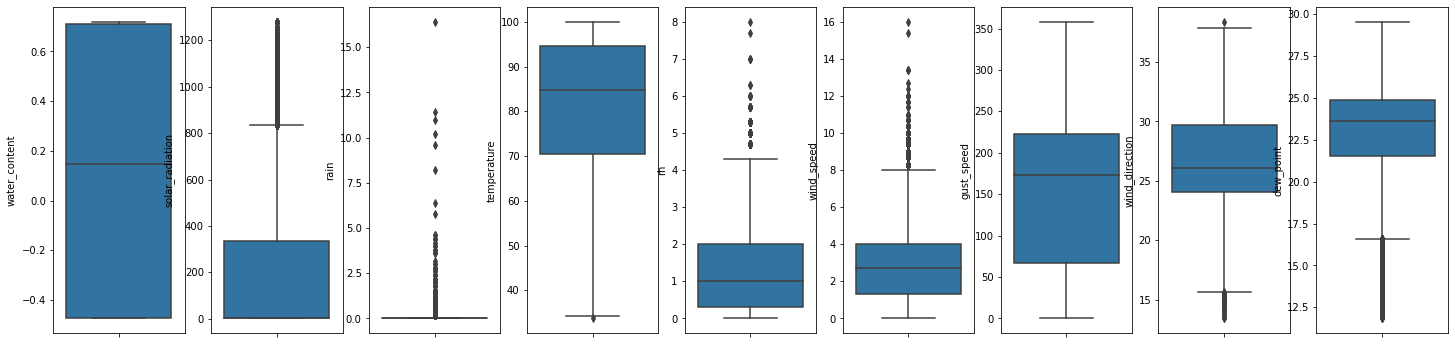

In [90]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=9, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['rain'], ax=axes[2])
sns.boxplot(y=data['temperature'], ax=axes[3])
sns.boxplot(y=data['rh'], ax=axes[4])
sns.boxplot(y=data['wind_speed'], ax=axes[5])
sns.boxplot(y=data['gust_speed'], ax=axes[6])
sns.boxplot(y=data['wind_direction'], ax=axes[7])
sns.boxplot(y=data['dew_point'], ax=axes[8])

print()
plt.show()

In [122]:
#remove outlier from dataset
from scipy.stats import zscore

#create two columns more of zscore value
data['temperature_zscore'] = zscore(data.temperature)
a = data[data['temperature_zscore'] >= 3]
b = data[data['temperature_zscore'] <= -3]

In [105]:
c = data.temperature.value_counts()

In [115]:
c.to_frame().head(50)

,temperature
100.0,1107
99.1,329
99.2,321
99.0,320
98.9,306
98.7,305
98.6,303
98.8,302
98.3,293
98.5,293


In [125]:
#remove outlier from dataset

data.rain.value_counts()

0.0     55264
0.2       880
0.4        92
0.6        29
0.8        24
1.0        18
1.4        12
2.0         8
1.2         7
2.8         3
2.4         3
4.4         3
1.8         3
2.2         2
2.6         2
4.6         2
4.0         2
1.6         2
3.0         2
3.8         2
3.6         2
8.2         1
4.2         1
3.2         1
11.0        1
16.4        1
10.2        1
9.6         1
11.4        1
5.8         1
6.4         1
Name: rain, dtype: int64